In [1]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', 'C:\\Users\\seanm\\Anaconda3\\python35.zip', 'C:\\Users\\seanm\\Anaconda3\\DLLs', 'C:\\Users\\seanm\\Anaconda3\\lib', 'C:\\Users\\seanm\\Anaconda3', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\seanm\\.ipython', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\TauHybridSolver\\GillesPy2', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\TauHybridSolver\\GillesPy2']


In [17]:
import math
import gillespy2
from gillespy2.basic_tau_leaping_solver import BasicTauLeapingSolver
from gillespy2.basic_ssa_solver import BasicSSASolver

In [18]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [19]:
model = MichaelisMenten()

In [20]:
%time results = model.run(solver=BasicTauLeapingSolver(), show_labels=True)
# import cProfile

# cProfile.run('model.run(solver=BasicTauLeapingSolver(), show_labels=True)', sort='tot')

Wall time: 221 ms


In [21]:
%time results2 = model.run(solver=BasicSSASolver(), show_labels=True)

Wall time: 150 ms


In [22]:
# cProfile.run('model.run(solver=BasicSSASolver(), show_labels=True, debug=False)', sort='tot')
# %time results2 = model.run(solver=BasicSSASolver(), show_labels=True, profile=True, debug=False)

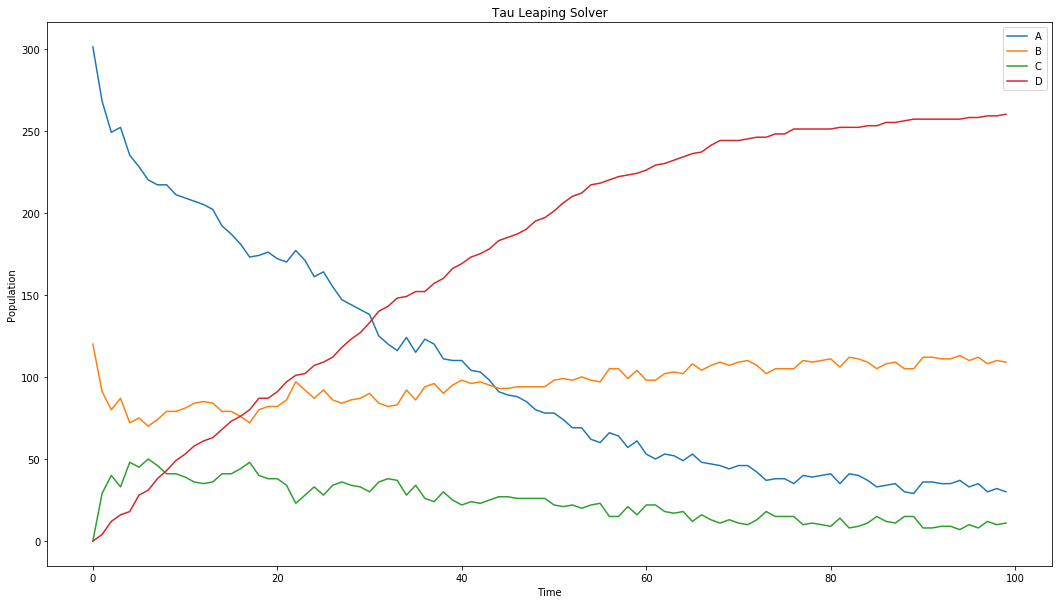

In [23]:
plt.figure(figsize=(18,10))
plt.title("Tau Leaping Solver")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['B'], label='B')
plt.plot(results['time'], results['C'], label='C')
plt.plot(results['time'], results['D'], label='D')
plt.legend(loc='best')


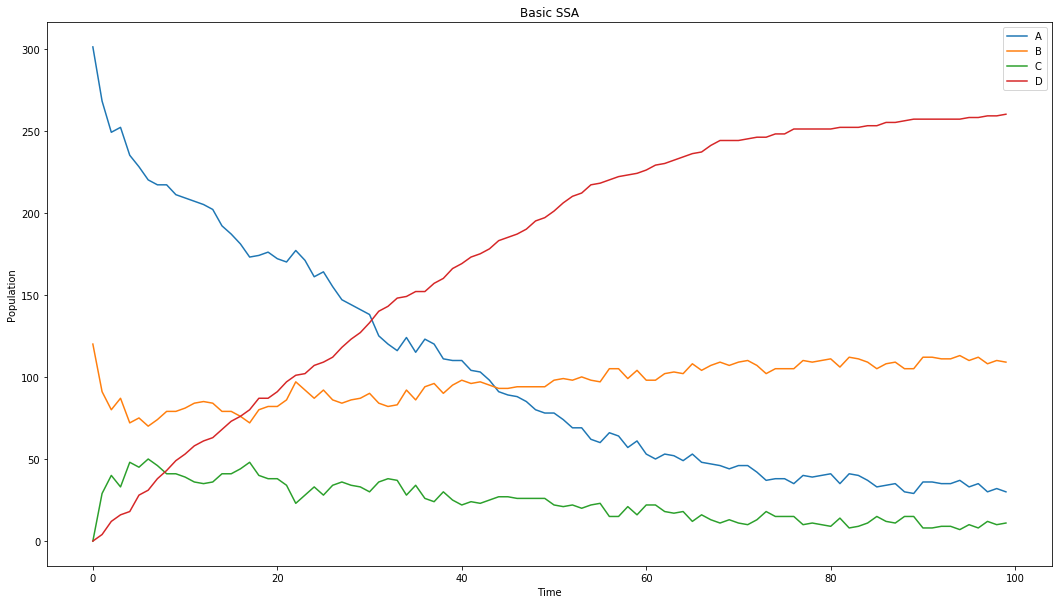

In [24]:
plt.figure(figsize=(18,10))
plt.title("Basic SSA")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results2['time'], results['A'], label='A')
plt.plot(results2['time'], results['B'], label='B')
plt.plot(results2['time'], results['C'], label='C')
plt.plot(results2['time'], results['D'], label='D')
plt.legend(loc='best')

In [25]:
total_difference = {}
for i in results:
    total_difference[i] = [x - y for x,y in zip(results['A'], results2['A'])]

In [11]:
print(total_difference)

{'time': [0, -4, 11, -14, -8, -3, 2, 4, -11, -7, -15, -12, -9, -21, -30, -16, -14, -7, -16, 4, 3, -4, -9, 0, 0, -3, -1, -1, -9, -4, -16, -10, -12, -6, -7, 4, 2, -2, 3, -2, -4, -14, -10, -12, -15, -9, -15, -4, -9, -13, -8, -9, -10, -11, -6, -4, -12, -8, -16, -2, -16, -19, -20, -12, -10, -16, -9, -24, -14, -11, -17, -15, -8, -15, -15, -22, -13, -16, -20, -18, -19, -19, -17, -14, -21, -20, -14, -12, -17, -15, -13, -14, -16, -9, -12, -12, -15, -18, -22, -23], 'C': [0, -4, 11, -14, -8, -3, 2, 4, -11, -7, -15, -12, -9, -21, -30, -16, -14, -7, -16, 4, 3, -4, -9, 0, 0, -3, -1, -1, -9, -4, -16, -10, -12, -6, -7, 4, 2, -2, 3, -2, -4, -14, -10, -12, -15, -9, -15, -4, -9, -13, -8, -9, -10, -11, -6, -4, -12, -8, -16, -2, -16, -19, -20, -12, -10, -16, -9, -24, -14, -11, -17, -15, -8, -15, -15, -22, -13, -16, -20, -18, -19, -19, -17, -14, -21, -20, -14, -12, -17, -15, -13, -14, -16, -9, -12, -12, -15, -18, -22, -23], 'D': [0, -4, 11, -14, -8, -3, 2, 4, -11, -7, -15, -12, -9, -21, -30, -16, -14, -7, -

In [12]:
total_sum = 0
total_len = 0
for i in total_difference:
    total_sum += sum(total_difference[i])
    total_len += len(total_difference[i])

In [13]:
average_diff = abs(total_sum / total_len)
print("Average population difference between Tau and SSA simulations: ", average_diff)

Average population difference between Tau and SSA simulations:  10.63


TODO: Use 'screen' to run simulations (ctrl+a - cmd mode, ctrl+d - initialize screen, -r - disconnect screen)

Make sure to run simulations using all 3 solvers (tau, tau-hybrid, and ssa) over increasing values of V